Яркін Денис, МФ-41

# Вступ

Для цієї роботи був обраний ієрархічний метод кластеризаризації, саме будемо використовувати агломеративну кластеризацію. Ціллю роботи є дослідження принципу роботи ієрархічної кластеризації, порівняти його з методом К-середніх, та розібратись у параметрах алгоритму.

# Принцип роботи

В агломеративній кластерізації кожен елемент спочатку сприймається як окремий кластер. На кожному кроці алгоритму знаходяться два найближчі кластери, що об'єднуються в один. Цей процес продовжується поки всі елементи не будуть об'єднані в єдиний кластер. Для розрахунку відстані між кластерами використовується окрема метрика, про яку ми поговоримо пізніше.

Під час процесу ієрархічноїкластеризації будується дендрограма, на якій можна побачити які елементи та кластери об'єднувались та яка між ними відстань. Розглянемо цей процес на прикладі.

Спочатку імпортуємо всі необхідні у майбутньому бібліотеки та функції

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Створимо якийсь тестовий датасет

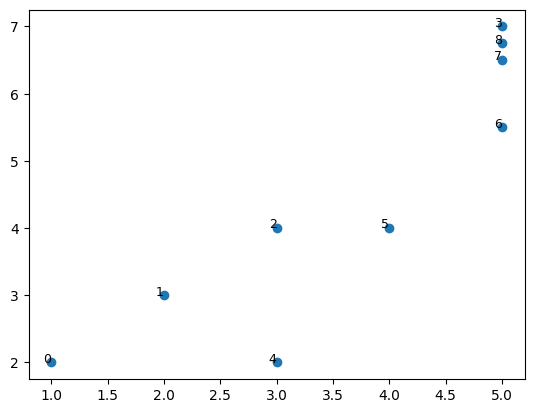

In [2]:
X = np.array([
    [1, 2],    # 0
    [2, 3],    # 1
    [3, 4],    # 2
    [5, 7],    # 3
    [3, 2],    # 4
    [4, 4],    # 5
    [5, 5.5],  # 6
    [5, 6.5],  # 7
    [5, 6.75], # 8
])
plt.scatter(X[:, 0], X[:, 1])
for i, (xi, yi) in enumerate(zip(X[:, 0], X[:, 1])):
    plt.text(xi, yi, str(i), fontsize=9, ha='right')
plt.show()


Тепер побудуємо дендрограму

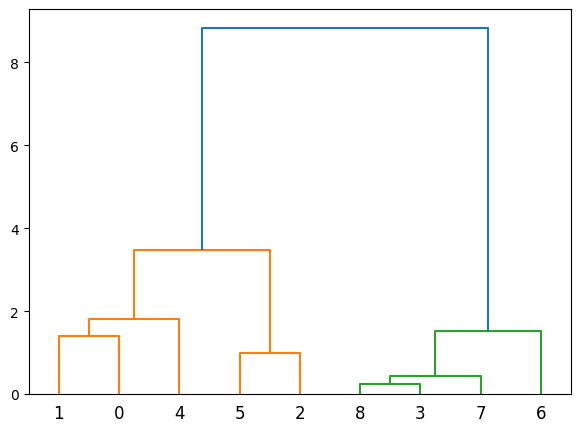

In [3]:
linked = linkage(X, 'ward')
plt.figure(figsize=(7, 5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()


На цій дендрограмі на горизонтальній вісі розташовані номери вершин, а вертикальна вісь -- це відстань між кластерами. Наприклад, на дендрограмі можна побачити, що відстань між кластерами [1, 0, 4] та [5, 2] приблизно 3.74. Таким чином, чим вище розташована горизонтальна лінія, що об'єднує кластери, тим більше відстань між цими кластерами. Це дозволяє нам знайти "оптимальну" максимальну відстань між кластерами та "відрізати" всі кластери, що знаходяться вище цієї межі у дендрограмі.

При розподіленні на N кластерів можна рухатись зверху вниз по дендрограмі та видалити N-1 горизонтальних ліній. Наприклад, якщо ми хочему розділити наведений вище датасет на три кластери, то ми видалимо горизонтальні "об'єднуючі" лінії на висотах ~9 та ~ 3.75.

Запустимо кластеризацію на три кластери щоб продемонструвати цю ідею.

Як можна побачити, дійсно були обрані кластери які можна отримати використовуючи ідею, описану вище.

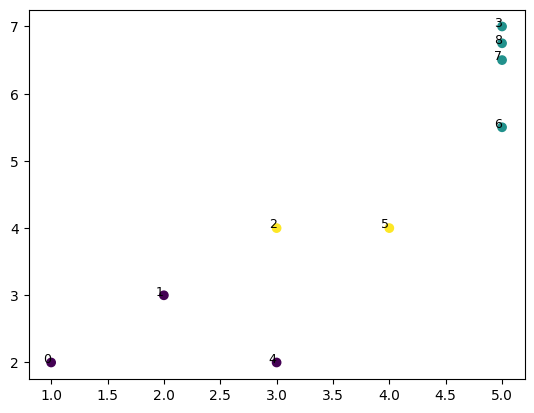

In [4]:
cluster = AgglomerativeClustering(n_clusters=3, 
                                  metric='euclidean', 
                                  linkage='ward')
cluster_labels = cluster.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
for i, (xi, yi) in enumerate(zip(X[:, 0], X[:, 1])):
    plt.text(xi, yi, str(i), fontsize=9, ha='right')
plt.show()

# Параметри алгоритму агломеративної ієрархічної кластеризації

Для тестування параметрів нам знадобиться функція для генерації рандомніх датасетів

In [5]:
def generate_dataset(n, max_x, max_y, seed=None):
    if seed is not None:
        random.seed(seed)
    points = [[random.uniform(0, max_x), random.uniform(0, max_y)] for _ in range(n)]
    return np.array(points)

Приклад її роботи:

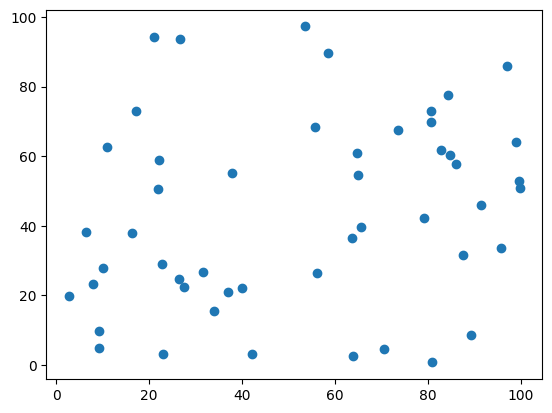

In [6]:
ds_random = generate_dataset(50, 100, 100, 42)
plt.scatter(ds_random[:, 0], ds_random[:, 1])
plt.show()

## `linkage`

Метод знаходження відстані між кластерами. Можливі значення:
- `'single'` -- відстань між кластерами визначається як відстань між найближчими елементами в цих кластерах
- `'complete'` -- аналогічно `single`, але береться відстань між 
- `'average'` -- середня відстань між усіма парами точок. Тобто беруться усі можливі комбінації точки з одного кластеру та точки з іншого, рахується відстань між ними, та потім береться середнє аріфметичне усіх таких відстаней.
- `'ward'` -- метод Варда. Мінімізує суму квадратів відхилень між елементами всередині кластера. На кожному кроці об'єднуються два кластери, злиття яких найменше збільшує суму квадратів відхилень.

In [7]:
def cluster_and_plot(datasets, params):
    rows = len(datasets)
    cols = len(params)
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(3 * cols, 3 * rows))
    
    def plot(dataset, axes, i, j, labels, title):
        if len(axes.shape) == 1:
            axes[j].scatter(dataset[:, 0], dataset[:, 1], c=labels)
            axes[j].set_title(title)
        else:
            axes[i, j].scatter(dataset[:, 0], dataset[:, 1], c=labels)
            axes[i, j].set_title(title)
            
    for i, dataset in enumerate(datasets):
        for j, cur_params in enumerate(params):
            cluster = AgglomerativeClustering(n_clusters=N_CLUSTERS, 
                                              metric=cur_params['metric'], 
                                              linkage=cur_params['linkage'])
            cluster_labels = cluster.fit_predict(dataset)
            plot(dataset, axes, i, j, cluster_labels, cur_params['title'])
    plt.tight_layout()
    plt.show()

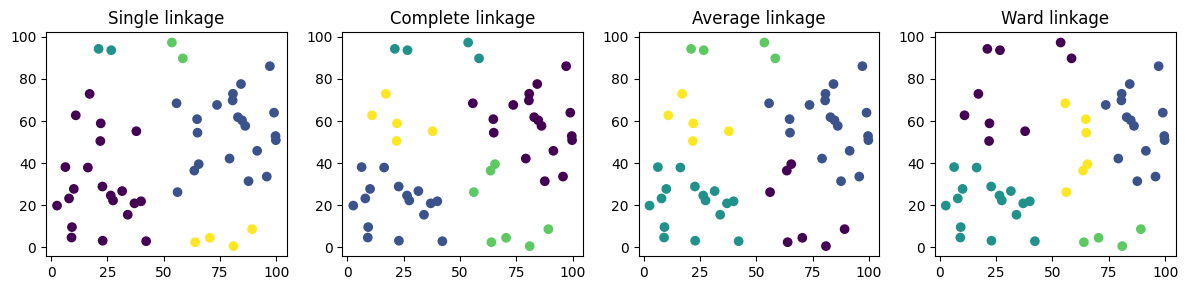

In [8]:
from sklearn.datasets import make_moons
ds_moons, y = make_moons(n_samples=200, noise=0.07, random_state=42)
datasets = [ds_random]
params = [
    {
        'metric': 'euclidean',
        'linkage': 'single',
        'title': 'Single linkage'
    },
    {
        'metric': 'euclidean',
        'linkage': 'complete',
        'title': 'Complete linkage'
    },
    {
        'metric': 'euclidean',
        'linkage': 'average',
        'title': 'Average linkage'
    },
    {
        'metric': 'euclidean',
        'linkage': 'ward',
        'title': 'Ward linkage'
    },
]

N_CLUSTERS = 5

cluster_and_plot(datasets, params)

Також протестуємо на більш структурованому датасеті:

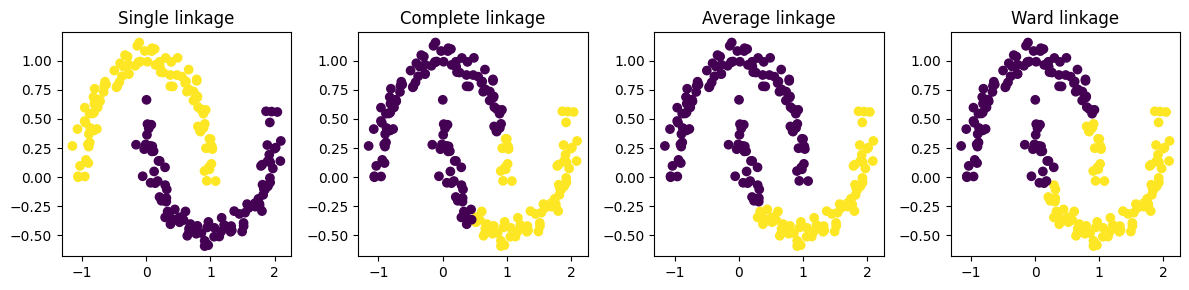

In [9]:
from sklearn.datasets import make_moons

ds_moons, y = make_moons(n_samples=200, noise=0.07, random_state=42)

N_CLUSTERS = 2
cluster_and_plot([ds_moons], params)

## `metric`

Метрика відстані. Використовується для знаходження відстані між елементами датасету.
- `'euclidean'` -- евклідова відстань між точками, значення за замовчуванням. Відстань у просторі у "привичному розумінні", а саме корінь з суми квадратів різниць між відповідними координатами точок
- `'manhattan'` -- манхеттенська відстань. Сума різниць між відповідними координатами
- `'cosine'` -- косинус кута між векторами елементів датасету

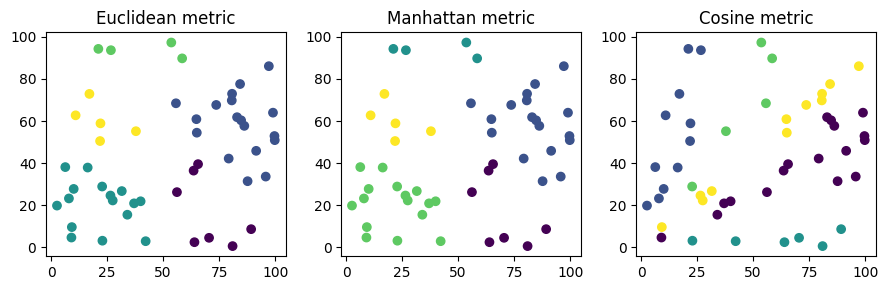

In [10]:
params = [
    {
        'metric': 'euclidean',
        'linkage': 'average',
        'title': "Euclidean metric"
    },
    {
        'metric': 'manhattan',
        'linkage': 'average',
        'title': "Manhattan metric"
    },
    {
        'metric': 'cosine',
        'linkage': 'average',
        'title': "Cosine metric"
    }
]

N_CLUSTERS = 5
cluster_and_plot([ds_random], params)

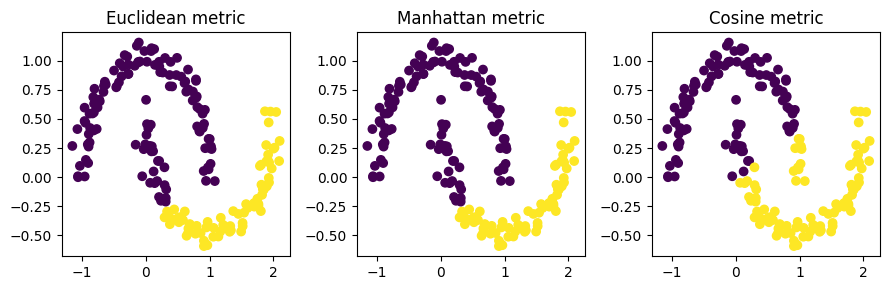

In [11]:
N_CLUSTERS = 2
cluster_and_plot([ds_moons], params)

# Порівняння з K-means

Однією з головних переваг ієрархічної кластеризації перед методом К-середніх є можливість не визначати кількість кластерів одразу, а побачити візуально яка кількість кластерів є оптимальною за допомогою дендрограми. Також, так як ієрархічна кластеризація об'єднує елементи потрошки, роблячи кластери все більше і більше, то вона може працювати ефективно з кластерами складних форм, у той час як K-means є сенс використовувати тільки з кластерами сферічної форми.

Однак, треба відзначити що алгоритм К-середніх є набагато швидшим за агломеративно кластеризацію, що може бути особливо помітно на великих датасетах. 

Тому якщо кількість кластерів відома та вони мають опуклу форму, є сенс використовувати K-means, але в інших випадках ієрархічна кластеризація є більш гнучкою та може бути використана у більшій кількості випадків. Також дендрограми є ефективним інструментом дослідження даних.

Протестуємо ці методи на різних "іграшкових" датасетах.

In [12]:
from sklearn.datasets import make_circles, make_blobs
RANDOM_STATE = 42
N_SAMPLES = 200
ds_circles = make_circles(n_samples=N_SAMPLES, factor=.5, noise=.05, random_state=RANDOM_STATE)[0]
ds_moons = make_moons(n_samples=N_SAMPLES, noise=0.07, random_state=RANDOM_STATE)[0]
ds_blobs = make_blobs(n_samples=N_SAMPLES, centers=5, random_state=RANDOM_STATE)[0]

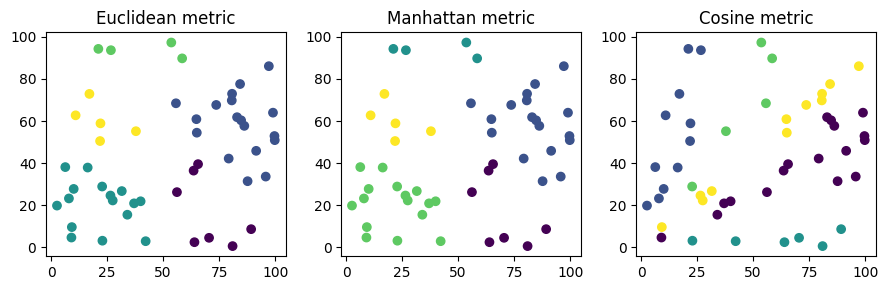

In [13]:
N_CLUSTERS = 5
cluster_and_plot([ds_random], params)

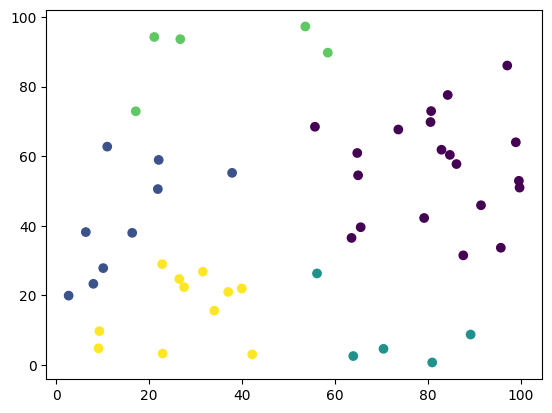

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=RANDOM_STATE)
kmeans.fit(ds_random)
plt.scatter(ds_random[:, 0], ds_random[:, 1], c=kmeans.labels_)
plt.show()

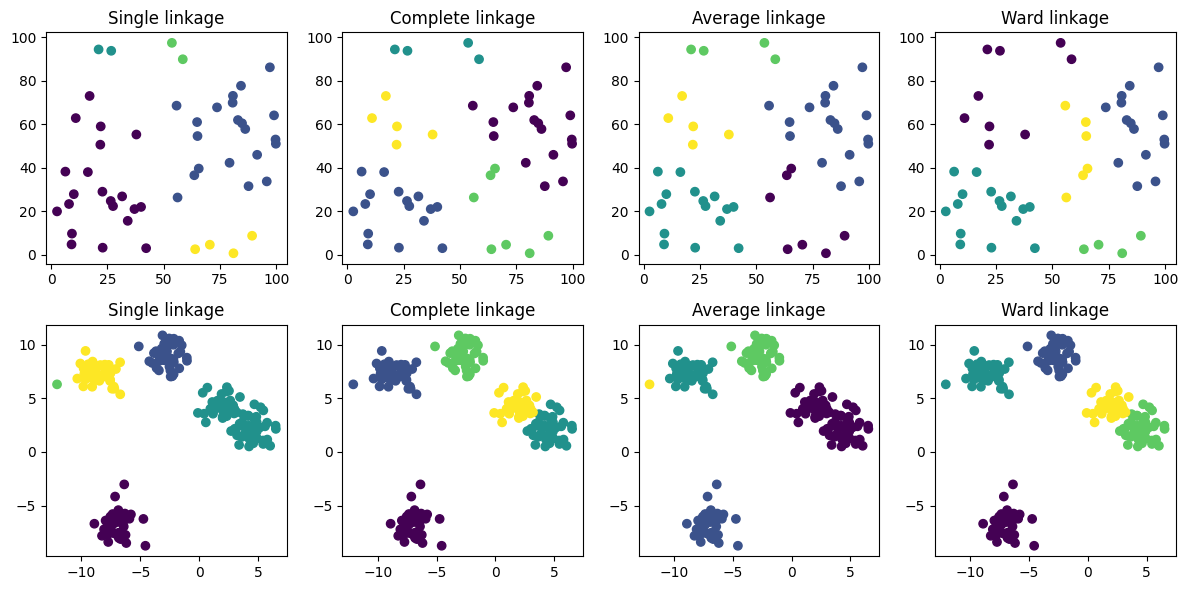

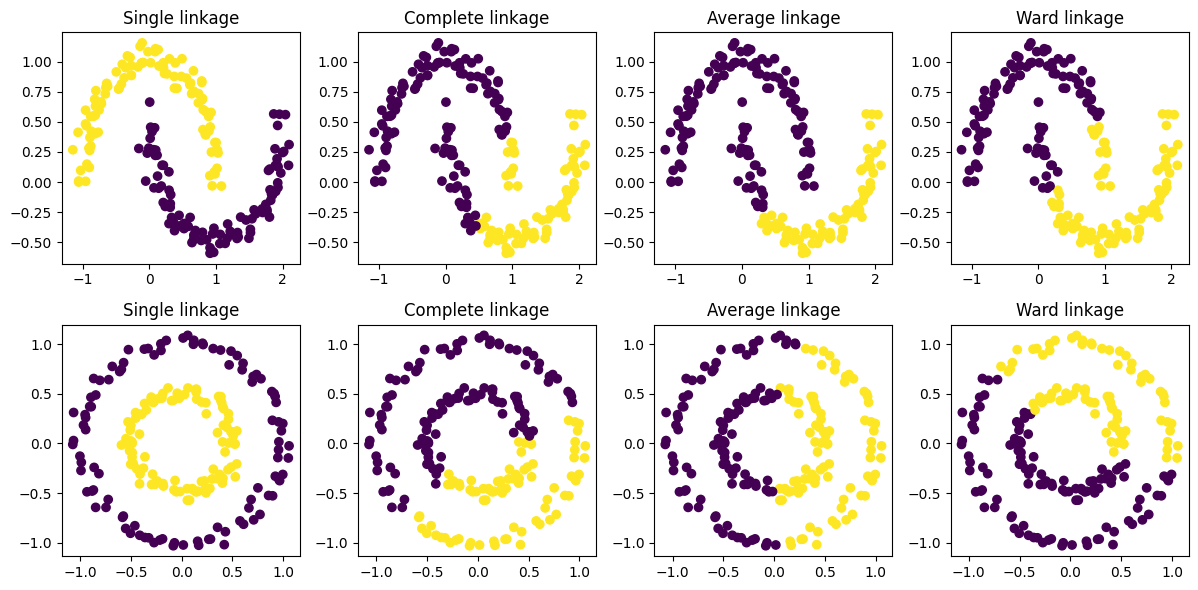

In [15]:
params = [
    {
        'metric': 'euclidean',
        'linkage': 'single',
        'title': 'Single linkage'
    },
    {
        'metric': 'euclidean',
        'linkage': 'complete',
        'title': 'Complete linkage'
    },
    {
        'metric': 'euclidean',
        'linkage': 'average',
        'title': 'Average linkage'
    },
    {
        'metric': 'euclidean',
        'linkage': 'ward',
        'title': 'Ward linkage'
    },
]
N_CLUSTERS = 5
cluster_and_plot([ds_random, ds_blobs], params)
N_CLUSTERS = 2
cluster_and_plot([ds_moons, ds_circles], params)

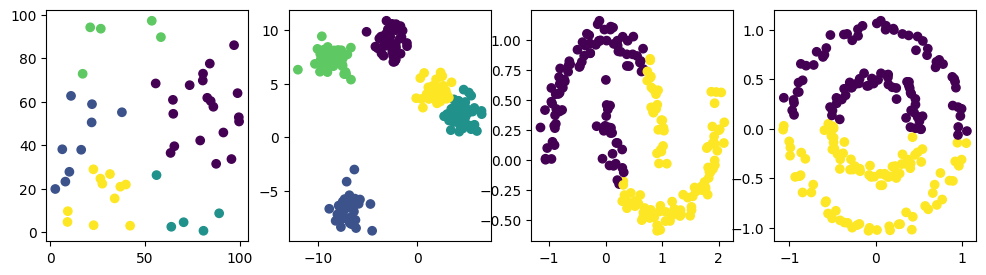

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE)
kmeans.fit(ds_random)
axes[0].scatter(ds_random[:, 0], ds_random[:, 1], c=kmeans.labels_)

kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE)
kmeans.fit(ds_blobs)
axes[1].scatter(ds_blobs[:, 0], ds_blobs[:, 1], c=kmeans.labels_)

kmeans = KMeans(n_clusters=2, random_state=RANDOM_STATE)
kmeans.fit(ds_moons)
axes[2].scatter(ds_moons[:, 0], ds_moons[:, 1], c=kmeans.labels_)

kmeans = KMeans(n_clusters=2, random_state=RANDOM_STATE)
kmeans.fit(ds_circles)
axes[3].scatter(ds_circles[:, 0], ds_circles[:, 1], c=kmeans.labels_)

plt.show()

Як можна побачити, параметри агломератичної кластеризації можна налаштувати так, що вона добре працює навіть зі складними формами. Наприклад, при використанні методу знаходження відстані між кластерами `single` та метрики відстані `euclidean`, ієрархічна кластеризація добре справляється з датасатами `moons` та `circles`